## 8주차 중간고사

### DeepLearning (Full Connected)

1. 해당 소스를 이용하여 ML 분류 RF, LR, DT

2. 해당 소스를 이용하여 FCNN

3. 해당 소스를 이용하여 CNN

4. 모든 소스에는 F1값 및 confusion matrix 표시

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [16]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

### 1. Data Load

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [19]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [20]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [21]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['class'] = label.fit_transform(df['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


### 2. Train Test Split

In [23]:
X=df.drop(['class'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [24]:
y = df['class']
y.value_counts().sort_index(ascending=True)

class
0     384
1      69
2    1210
3      65
Name: count, dtype: int64

In [25]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,buying,maint,doors,persons,lug_boot,safety
520,0,3,3,0,0,2
621,0,0,3,0,2,1
1017,2,0,1,2,2,1
1273,2,1,3,0,1,2
924,2,3,2,0,0,1
...,...,...,...,...,...,...
835,0,1,2,2,0,2
1216,2,1,1,0,2,2
1653,1,1,1,0,0,1
559,0,0,0,2,2,2


In [27]:
X_train.shape[1]

6

In [28]:
y_test.shape[1]

4

### 3. Make a Model

In [32]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) 

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 9412 (36.77 KB)
Trainable params: 9412 (36.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_split = 0.1, shuffle = True)
pred_DL = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/50


37/37 [==============================] - 2s 11ms/step - loss: 0.9459 - accuracy: 0.6346 - val_loss: 0.6943 - val_accuracy: 0.7231
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.7196 - val_loss: 0.6551 - val_accuracy: 0.7308
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.7144 - val_loss: 0.6228 - val_accuracy: 0.7615
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7178 - val_loss: 0.5964 - val_accuracy: 0.7692
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7401 - val_loss: 0.5711 - val_accuracy: 0.7692
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7581 - val_loss: 0.5281 - val_accuracy: 0.7615
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7744 - val_loss: 0.4766 - val_accuracy: 0.7846
Epoch 8/50
37/37 

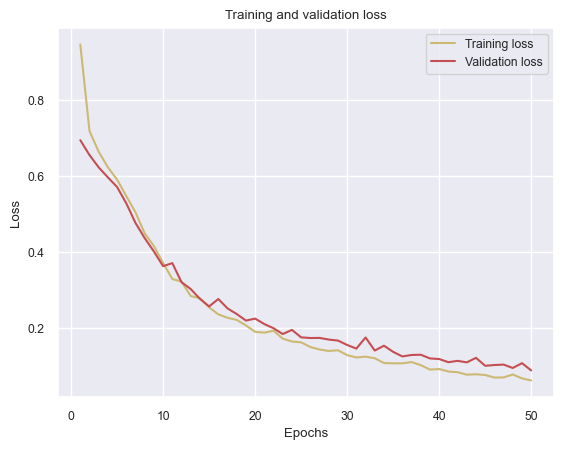

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

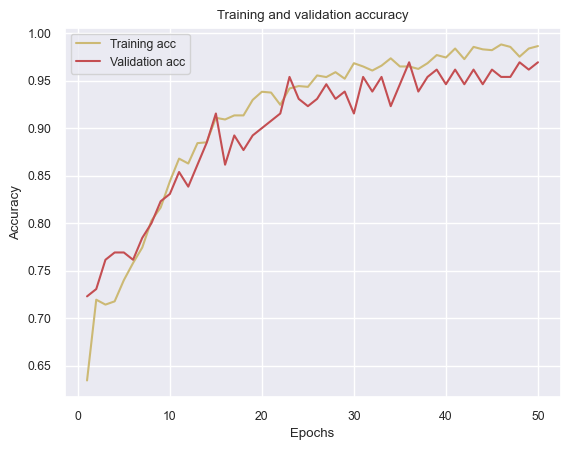

In [36]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.90      0.95        21
           2       1.00      0.98      0.99       296
           3       0.88      0.88      0.88        16

    accuracy                           0.98       432
   macro avg       0.95      0.94      0.94       432
weighted avg       0.98      0.98      0.98       432

[[ 99   0   0   0]
 [  0  19   0   2]
 [  6   0 290   0]
 [  2   0   0  14]]
